# InterviewMate - Analysis with PDF Text

In [3]:
# %pip install pdfplumber
# %pip install PyPDF2
# %pip install pdf2image  
# %pip install pytesseract    

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import os
import PyPDF2
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
import pdfplumber
import pytesseract
from pdf2image import convert_from_path 
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity  
from gensim.models import Word2Vec  
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer   
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Try to export a pdf by PyPDF2 vs pdfplumber

In [5]:
file_path = '../data/data/data/ENGINEERING/10030015.PDF'
with open(file_path, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    print(f'Number of pages: {len(reader.pages)}' )
    page = reader.pages[0]
    text = page.extract_text()
    print(text)
    
with pdfplumber.open(file_path) as pdf:
    first_page = pdf.pages[0]
    text = first_page.extract_text()
    print(text)

Number of pages: 1
ENGINEERING LAB TECHNICIAN
Career Focus
My main objective in seeking employment with Triumph Actuation Systems Inc. is to work in a professional atmosphere where I can utilize my
skills and continue to gain experience in the aerospace industry to advance in my career.
Professional Experience
Engineering Lab Technician
 
Oct 2016
 
to 
Current
 
Company Name
 
ï¼​ 
City
 
, 
State
Responsible for testing various seat structures to meet specific certification requirements. Â 
Maintain and calibrate test instruments to ensure testing capabilities are maintained.
Ensure data is captured and recorded correctly for certification test reports.
Duties also dynamic test set-up and static suite testing. 
Engineering Lab Technician, Sr. Specialist
 
Apr 2012
 
to 
Oct 2016
 
Company Name
 
ï¼​ 
City
 
, 
State
Utilized skills learned from LabView Course 1 training to construct and maintain LabView VI programs.
Responsible for fabricating and maintaining hydraulic/electrical tes

In [6]:
# def extract_pdf_text(file_path):
#     try: 
#         text = ""
#         with pdfplumber.open(file_path) as pdf:
#             for page in pdf.pages:
#                 text += page.extract_text() + "\n"
#         return text 
#     except Exception as e:
#         print(f"Error extracting text from PDF: {e}")
#         return ""
    
# def ocr_pdf(file_path):
#     try:
#         images = convert_from_path(file_path)
#         text = ""
#         for image in images:
#             text += pytesseract.image_to_string(image) + "\n"
#         return text
#     except Exception as e:
#         print(f"Error performing OCR on PDF: {e}")
#         return ""
    
# records = []
# base_dir = '../data/data/data/ENGINEERING/' 
# # base_dir = '../data/data/data/' 


# for root, dirs, files in os.walk(base_dir):
#     for filename in files:
#         if filename.endswith('.PDF') or filename.endswith('.pdf'):
#             file_path = os.path.join(root, filename)
#             text = extract_pdf_text(file_path)
#             if not text.strip():
#                 text = ocr_pdf(file_path)
#             records.append({'Filename': filename, 'Filepath': file_path, 'Extracted_Text': text})

# df = pd.DataFrame(records)

In [7]:
# df.to_csv('../data/data/processed_data/PDF_Engineering.csv', index=False)

In [16]:
df = pd.read_csv('../data/data/processed_data/PDF_Engineering.csv') 
df.head()

,Filename,Filepath,Extracted_Text
0,10030015.pdf,../data/data/data/ENGINEERING/10030015.pdf,ENGINEERING LAB TECHNICIAN\nCareer Focus\nMy m...
1,10219099.pdf,../data/data/data/ENGINEERING/10219099.pdf,EQUIPMENT ENGINEERING TECHNICIAN\nProfessional...
2,10624813.pdf,../data/data/data/ENGINEERING/10624813.pdf,ENGINEERING OPERATIONS DIRECTOR\nExecutive Pro...
3,10712803.pdf,../data/data/data/ENGINEERING/10712803.pdf,ENGINEERING SERVICES MANAGER\nExecutive Profil...
4,10985403.pdf,../data/data/data/ENGINEERING/10985403.pdf,MECHANICAL ENGINEERING INTERN\nSummary\nCAD | ...


In [17]:
df["Category"] = "Engineering"
df.head()

,Filename,Filepath,Extracted_Text,Category
0,10030015.pdf,../data/data/data/ENGINEERING/10030015.pdf,ENGINEERING LAB TECHNICIAN\nCareer Focus\nMy m...,Engineering
1,10219099.pdf,../data/data/data/ENGINEERING/10219099.pdf,EQUIPMENT ENGINEERING TECHNICIAN\nProfessional...,Engineering
2,10624813.pdf,../data/data/data/ENGINEERING/10624813.pdf,ENGINEERING OPERATIONS DIRECTOR\nExecutive Pro...,Engineering
3,10712803.pdf,../data/data/data/ENGINEERING/10712803.pdf,ENGINEERING SERVICES MANAGER\nExecutive Profil...,Engineering
4,10985403.pdf,../data/data/data/ENGINEERING/10985403.pdf,MECHANICAL ENGINEERING INTERN\nSummary\nCAD | ...,Engineering


In [9]:
def Cleaned_Text(text):
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)  
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = text.replace('\n', ' ')
    text = text.lower()  
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text.strip()

df['Cleaned_Text'] = df['Extracted_Text'].apply(Cleaned_Text)

In [10]:
df['Cleaned_Text'][0]

'engineering lab technician career focus main objective seeking employment triumph actuation systems inc work professional atmosphere utilize skills continue gain experience aerospace industry advance career professional experience engineering lab technician oct current company name city state responsible testing various seat structures meet specific certification requirements maintain calibrate test instruments ensure testing capabilities maintained ensure data captured recorded correctly certification test reports duties also dynamic test set static suite testing engineering lab technician sr specialist apr oct company name city state utilized skills learned labview course training construct maintain labview vi programs responsible fabricating maintaining hydraulic electrical test equipment complete development qualification programs apply engineering principles operate electrical mechanical hydraulic systems test pumps motors actuators aircraft work closely design engineers lab mana

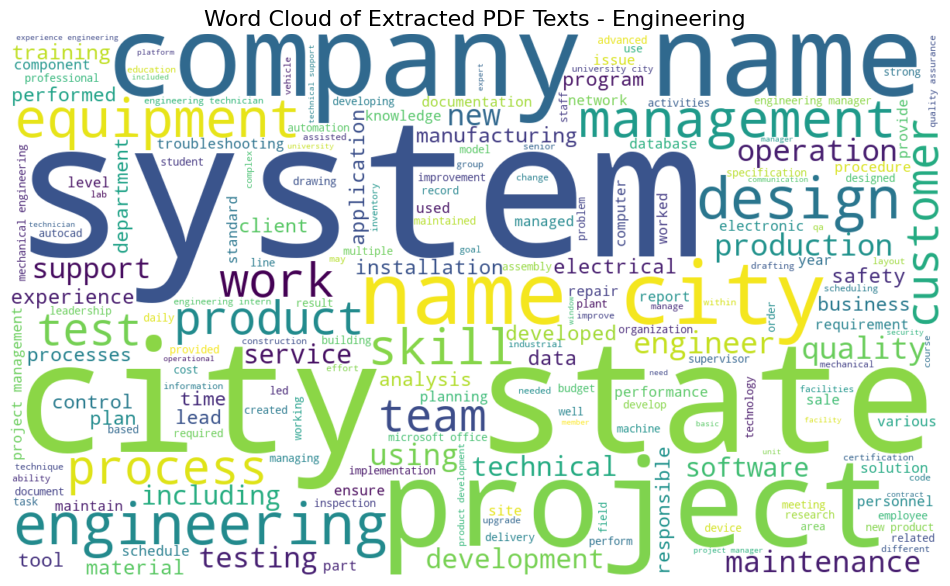

In [11]:
text = " ".join(df['Cleaned_Text'].tolist())

wordcloud = WordCloud(width=1200, height=700, background_color='white', stopwords=STOPWORDS).generate(text)  

img = wordcloud.to_image()
plt.figure(figsize=(12, 8)  )
plt.imshow(img, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Extracted PDF Texts - Engineering', fontsize=16)
plt.show()

## Word Embedding 
### TF-IDF

In [12]:
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['Cleaned_Text'])

### Word2Vec

In [13]:

def get_sentence_vector(text, model):
    words = [w for w in text.split() if w in model]
    if not words:
        return np.zeros(model.vector_size)
    vectors = np.array([model[w] for w in words])
    return np.mean(vectors, axis=0)   # or np.sum(vectors, axis=0)

word2vec = Word2Vec(sentences=[text.split() for text in df['Cleaned_Text']], vector_size=100, window=5, min_count=1, workers=4)
word2vec_vectors = np.array([get_sentence_vector(text, word2vec.wv) for text in df['Cleaned_Text']])



### Setence Transformers

In [14]:
sent_trans = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = sent_trans.encode(df['Cleaned_Text'].tolist(),  show_progress_bar=True)  

Batches: 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]


In [31]:
labels = df['Category']

In [ ]:
def evaluate_retrieval(embeddings, labels, k=10):
    sims = cosine_similarity(embeddings, embeddings)

    top1_correct = 0
    precision_at_k = 0
    recall_at_k = 0
    hit_rate = 0
    
    n = len(labels)

    for i in range(n):
        # sort similarities descending
        sim_scores = sims[i]
        
        # exclude itself using argsort
        ranked = np.argsort(sim_scores)[::-1]
        ranked = ranked[ranked != i]   # remove self
        
        topk = ranked[:k]
        retrieved_labels = [labels[j] for j in topk]
        
        true_label = labels[i]

        # ---------- Top-1 Accuracy ----------
        if retrieved_labels[0] == true_label:
            top1_correct += 1

        # ---------- Precision@K ----------
        correct_k = sum(1 for l in retrieved_labels if l == true_label)
        precision_at_k += correct_k / k

        # ---------- Recall@K ----------
        # count how many in entire dataset have same label
        total_same_class = sum(1 for l in labels if l == true_label) - 1  # minus itself
        recall_at_k += correct_k / max(1, total_same_class)

        # ---------- Hit Rate@K ----------
        # count total number of successful outcomes by the total number of attempts 
        if correct_k > 0:
            hit_rate += 1
        

    top1 = top1_correct / n
    precision = precision_at_k / n
    recall = recall_at_k / n
    hit_rate = hit_rate / n

    return top1, precision, recall, hit_rate

In [41]:
top1, precision, recall, hit_rate = evaluate_retrieval(embeddings, labels, k=10)
print("Evaluation Metrics for Sentence-BERT Embeddings:")
print(f"Top-1 Accuracy : {top1:.4f}")
print(f"Precision@5: {precision:.4f}")
print(f"Recall@5: {recall:.4f}")
print(f"Hit Rate@5: {hit_rate:.4f}")
    

Evaluation Metrics for Sentence-BERT Embeddings:
Top-1 Accuracy : 1.0000
Precision@5: 1.0000
Recall@5: 0.0855
Hit Rate@5: 1.0000


In [42]:
top1, precision, recall, hit_rate = evaluate_retrieval(tfidf_matrix, labels, k=10)
print("Evaluation Metrics for TF-IDF Embeddings:")
print(f"Top-1 Accuracy (TF-IDF): {top1:.4f}")
print(f"Precision@5 (TF-IDF): {precision:.4f}")
print(f"Recall@5 (TF-IDF): {recall:.4f}")
print(f"Hit Rate@5 (TF-IDF): {hit_rate:.4f}")   

Evaluation Metrics for TF-IDF Embeddings:
Top-1 Accuracy (TF-IDF): 1.0000
Precision@5 (TF-IDF): 1.0000
Recall@5 (TF-IDF): 0.0855
Hit Rate@5 (TF-IDF): 1.0000


In [43]:
top1, precision, recall, hit_rate = evaluate_retrieval(word2vec_vectors, labels, k=10)
print("Evaluation Metrics for Word2Vec Embeddings:")
print(f"Top-1 Accuracy (Word2Vec): {top1:.4f}")
print(f"Precision@5 (Word2Vec): {precision:.4f}")
print(f"Recall@5 (Word2Vec): {recall:.4f}")
print(f"Hit Rate@5 (Word2Vec): {hit_rate:.4f}")


Evaluation Metrics for Word2Vec Embeddings:
Top-1 Accuracy (Word2Vec): 1.0000
Precision@5 (Word2Vec): 1.0000
Recall@5 (Word2Vec): 0.0855
Hit Rate@5 (Word2Vec): 1.0000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def map_mrr(embeddings, labels, k=10):
    sims = cosine_similarity(embeddings, embeddings)

    AP_scores = []
    RR_scores = []

    n = len(labels)

    for i in range(n):
        sim_scores = sims[i]

        # sort high → low
        ranked = np.argsort(sim_scores)[::-1]

        # remove itself
        ranked = ranked[ranked != i]

        # optionally limit evaluation to Top-K
        topk = ranked[:k]

        true_label = labels[i]
        retrieved = [labels[j] for j in topk]

        # ---------- MRR ----------
        # measures how early the first correct result appears 
        rr = 0
        for rank, lab in enumerate(retrieved, start=1):
            if lab == true_label:
                rr = 1.0 / rank
                break
        RR_scores.append(rr)

        # ---------- MAP ----------
        # measures quality of ranking across many correct results
        hits = 0
        precision_sum = 0

        for rank, lab in enumerate(retrieved, start=1):
            if lab == true_label:
                hits += 1
                precision_sum += hits / rank

        if hits == 0:
            AP_scores.append(0)
        else:
            AP_scores.append(precision_sum / hits)

    MAP = np.mean(AP_scores)
    MRR = np.mean(RR_scores)

    return MAP, MRR


In [45]:
MAP_st, MRR_st = map_mrr(embeddings, labels, k=10)
print("Sentence-BERT → MAP:", MAP_st, "MRR:", MRR_st)


Sentence-BERT → MAP: 1.0 MRR: 1.0


In [46]:
MAP_tf, MRR_tf = map_mrr(tfidf_matrix, labels, k=10)
print("TF-IDF → MAP:", MAP_tf, "MRR:", MRR_tf)


TF-IDF → MAP: 1.0 MRR: 1.0


In [47]:
MAP_w2v, MRR_w2v = map_mrr(word2vec_vectors, labels, k=10)
print("Word2Vec → MAP:", MAP_w2v, "MRR:", MRR_w2v)


Word2Vec → MAP: 1.0 MRR: 1.0


In [49]:
np.save("model/sentence_tranformers.npy", embeddings)
